In [5]:
from ssqueezepy import ssq_cwt, cwt
import random
from PIL import Image
from matplotlib.pyplot import imsave

def ssq_cwt_generator(d):
    keys = list(d.keys())
    random.shuffle(keys, random=random.seed(42))
    for k in keys:
        Tx, _, _, _= ssq_cwt(d[k], 'morlet', fs=1000, nv=70, squeezing='sum')
        yield k, abs(Tx)

def save_ssq_images_to_disk(d, l, train_keys_concat, test_keys):

    for k, Tx in ssq_cwt_generator(d):
        if k in train_keys_concat:
            imsave(f'data/ssq/train/{l[k]}/{k}.jpg', Tx, cmap='jet')
        elif k in test_keys:
            imsave(f'data/ssq/test/{l[k]}/{k}.jpg', Tx, cmap='jet')

#save_ssq_images_to_disk(d_s1, l_s1, train_keys_concat, test_keys)

(530, 2000) (530,) (2000,)
(530, 2000) (530, 2000) (530, 2000)


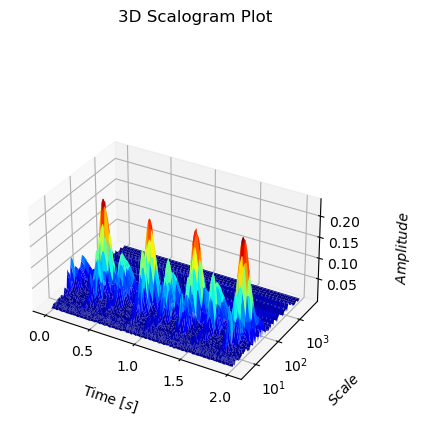

In [6]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import numpy as np
import scipy.signal as sg
import matplotlib.pyplot as plt
from ssqueezepy import cwt, imshow, ssq_cwt
import matplotlib.ticker as mticker

# get the recording

#%matplotlib qt
x = np.load('pcg/P025_S002_002.npy')
x = x/max(abs(x))
pcg_rec = sg.resample(x, 1000*len(x)//22050)
i = 17*2
sec = 2
pcg_rec = pcg_rec[1000*sec*i:1000*sec*(i+1)]

Wx, scales = cwt(pcg_rec, 'morlet', scales='log-piecewise', fs=1000, nv=70, )

time = np.linspace(0, sec, sec*1000)
print(Wx.shape, scales.shape, time.shape)


A, B = np.meshgrid(time, scales)
C = abs(Wx)

print(A.shape, B.shape, C.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')

"""                                                                                                                                                    
Scaling is done from here...                                                                                                                           
"""
x_scale=3
y_scale=2
z_scale=2

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0

def short_proj():
  return np.dot(Axes3D.get_proj(ax), scale)

ax.get_proj=short_proj

""""
ends here
"""
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"


ax.grid()
ax.plot_surface(A, np.log10(B), C, cmap='jet', edgecolor='none', antialiased=True)
ax.set_title('3D Scalogram Plot')
ax.yaxis.set_major_formatter(plt.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
# Set axes label
ax.set_xlabel(r'Time $[s]$', labelpad=20)
ax.set_ylabel(r'$Scale$', labelpad=20)
ax.set_zlabel(r'$Amplitude$', labelpad=20)
#ax.set_yticks(scales)
#ax.set_yscale('log')
#ax.set_yticks(np.arange(0,6,1))
#ax.set_zticks([0, 0.25])
#ax.set_ylim3d(0,500)
plt.show()



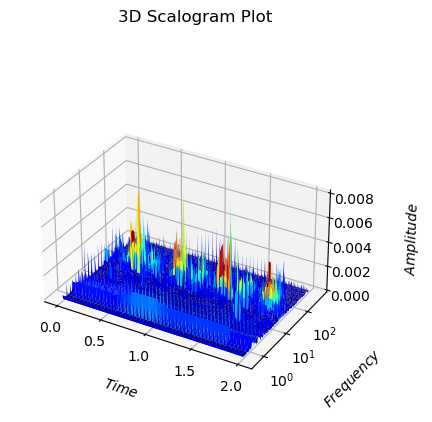

In [7]:
Tx, Wx2, ssq_freqs, _= ssq_cwt(pcg_rec, 'morlet', fs=1000, nv=70, squeezing='sum')
A, B = np.meshgrid(time, ssq_freqs)
C = abs(Tx)
ig = plt.figure()
ax = plt.axes(projection='3d')

"""                                                                                                                                                    
Scaling is done from here...                                                                                                                           
"""
x_scale=3
y_scale=2
z_scale=2

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0

def short_proj():
  return np.dot(Axes3D.get_proj(ax), scale)

ax.get_proj=short_proj

""""
ends here
"""
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"


ax.grid()
ax.plot_surface(A, np.log10(B), C, cmap='jet', edgecolor='none', antialiased=True)
ax.set_title('3D Scalogram Plot')
ax.yaxis.set_major_formatter(plt.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
# Set axes label
ax.set_xlabel(r'$Time$', labelpad=20)
ax.set_ylabel(r'$Frequency$', labelpad=20)
ax.set_zlabel(r'$Amplitude$', labelpad=20)
#ax.set_yticks(scales)
#ax.set_yscale('log')
#ax.set_yticks(np.arange(0,6,1))
#ax.set_zticks([0, 0.25])
#ax.set_ylim3d(0,500)
plt.show()


In [8]:
print(Tx.shape)

(530, 2000)


freqs: 189.08344944582987 27.040862568099485
scales: 10.452052 75.73337


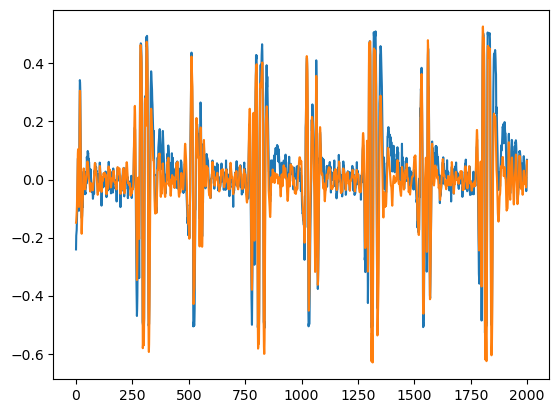

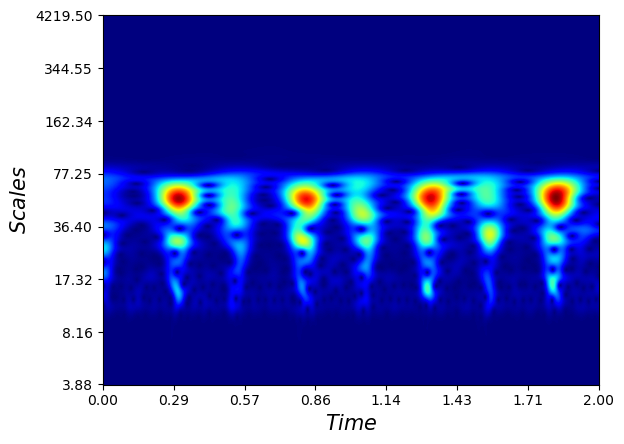

[[-0.14850064 -0.14875497 -0.14486964 ... -0.9896813  -0.995395
  -1.        ]
 [-0.5050447  -0.49626821 -0.46961465 ... -0.20003116 -0.21126966
  -0.21448696]
 [ 0.13415416  0.12240039  0.09393942 ... -0.13030811 -0.14912193
  -0.15560359]
 ...
 [-0.33188108  0.01024843  0.32183564 ... -0.52491492 -0.0629853
   0.57218951]
 [-0.40692794  0.23120295  0.08088336 ... -0.19351302 -0.09566784
   0.25590423]
 [-0.41129026  0.37132367 -0.26424643 ... -0.71505135  0.93011779
  -1.        ]]


In [9]:
from ssqueezepy import issq_cwt, icwt
cmin, cmax = 100, 300
print('freqs:', ssq_freqs[cmin], ssq_freqs[cmax])
print('scales:', scales[cmin], scales[cmax])
s_reconst = issq_cwt(Tx[cmin:cmax,:], 'morlet')

plt.plot(pcg_rec)
plt.plot(s_reconst)
plt.show()

Wx3, scales3 = cwt(s_reconst, 'morlet', scales='log-piecewise', fs=1000, nv=70)

imshow(Wx3, ylabel =r'$Scales$', xlabel=r'$Time$',yticks=scales3, xticks=time, abs=1, origin='lower', cmap='jet', aspect='auto')
plt.show()

def frequency_band_sepparator_ssq_cwt(s, freq_ranges):
    Tx, _, ssq_freqs, scales = ssq_cwt(s, 'morlet', fs=1000, nv=70, squeezing='sum')
    for r1,r2 in freq_ranges:
        cmin, cmax = np.argmin(abs(ssq_freqs-r1)), np.argmin(abs(ssq_freqs-r2))
        s_reconst = issq_cwt(Tx[cmax:cmin,:], 'morlet')
        s_reconst /= np.max(abs(s_reconst))
        Wx3, scales3 = cwt(s_reconst, 'morlet', scales='log-piecewise', fs=1000, nv=70)
        imshow(Wx3, yticks=ssq_freqs, xticks=time, abs=1, origin='lower', cmap='jet', aspect='auto')
        plt.show()
        plt.plot(s_reconst)
        plt.show()
        print('freqs:', ssq_freqs[cmin], ssq_freqs[cmax])
        print('scales:', scales[cmin], scales[cmax])
        print('------------------')

def frequency_band_sepparator_cwt(s, freq_ranges):
    Tx, Wx, ssq_freqs, scales = ssq_cwt(s, 'morlet', fs=1000, nv=70, squeezing='sum')
    for r1,r2 in freq_ranges:
        cmin, cmax = np.argmin(abs(ssq_freqs-r1)), np.argmin(abs(ssq_freqs-r2))
        print(cmin, cmax, Wx.shape)
        s_reconst = icwt(Wx[cmax:cmin,:], 'morlet', scales=scales[cmax:cmin])
        s_reconst /= np.max(abs(s_reconst))
        Wx3, scales3 = cwt(s_reconst, 'morlet', scales='log-piecewise', fs=1000, nv=70)
        imshow(Wx3, yticks=ssq_freqs, xticks=time, abs=1, origin='lower', cmap='jet', aspect='auto')
        plt.show()
        plt.plot(s_reconst)
        plt.show()
        print('freqs:', ssq_freqs[cmin], ssq_freqs[cmax])
        print('scales:', scales[cmin], scales[cmax])
        print('------------------')

def frequency_band_sepparator_speed_optimized(s, freq_ranges):
    Tx, _, ssq_freqs, scales = ssq_cwt(s, 'morlet', fs=1000, nv=70, squeezing='sum')
    freq_sepparated_signals = np.zeros((len(freq_ranges), len(s)))
    for i, (r1,r2) in enumerate(freq_ranges):
        cmin, cmax = np.argmin(abs(ssq_freqs-r1)), np.argmin(abs(ssq_freqs-r2))
        s_reconst = issq_cwt(Tx[cmax:cmin,:], 'morlet')
        s_reconst /= np.max(abs(s_reconst))
        freq_sepparated_signals[i,:] = s_reconst
    return freq_sepparated_signals

out = frequency_band_sepparator_speed_optimized(pcg_rec[:500], [(0, 20), (20, 40), (40,60), (60,80), (100, 200), (200, 300), (300, 400), (400, 500)])
print(out)

In [10]:
out = frequency_band_sepparator_speed_optimized(pcg_rec[:500], [(0, 20), (20, 40), (40,60), (60,80), (100, 200), (200, 300), (300, 400), (400, 500)])

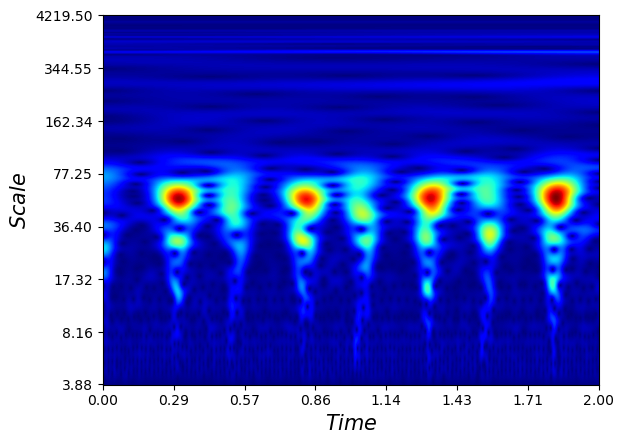

In [11]:

fig = imshow(Wx, ylabel =r'$Scale$', xlabel=r'$Time$',yticks=scales, xticks=time, abs=1, origin='lower', cmap='jet', aspect='auto')
plt.show()

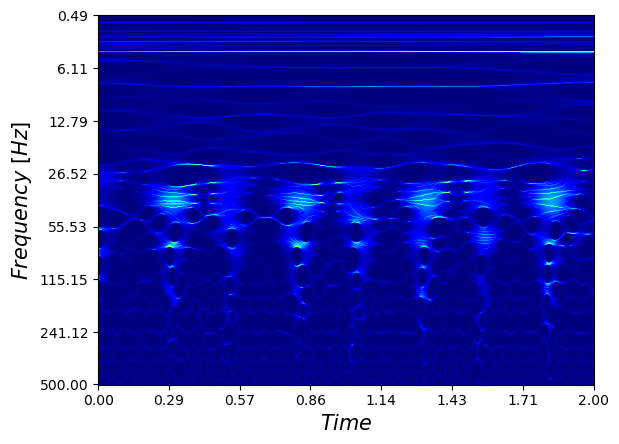

In [12]:
# SSQ CWT Scalogram heatmap
fig = imshow(Tx, ylabel =r'$Frequency$ $[Hz]$', xlabel=r'$Time$',yticks=ssq_freqs, xticks=time, abs=1, origin='lower', cmap='jet', aspect='auto')

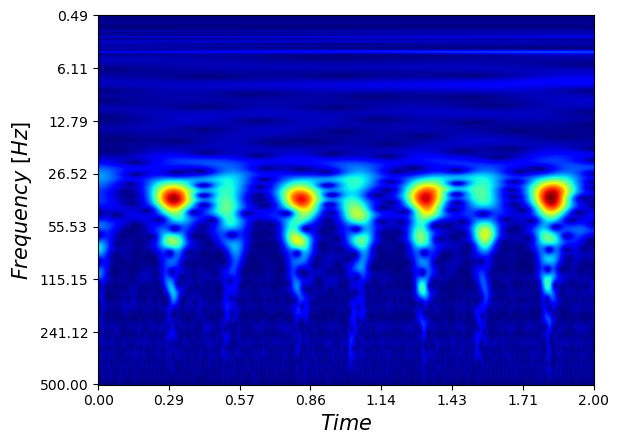

In [13]:
# CWT with pseudo-frequencies
fig = imshow(Wx2, ylabel =r'$Frequency$ $[Hz]$', xlabel=r'$Time$',yticks=ssq_freqs, xticks=time, abs=1, origin='lower', cmap='jet', aspect='auto')
plt.show()

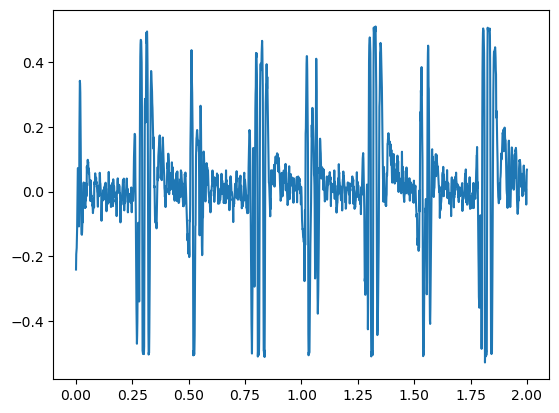

In [14]:
fig2 = plt.plot(time, pcg_rec)
plt.show()

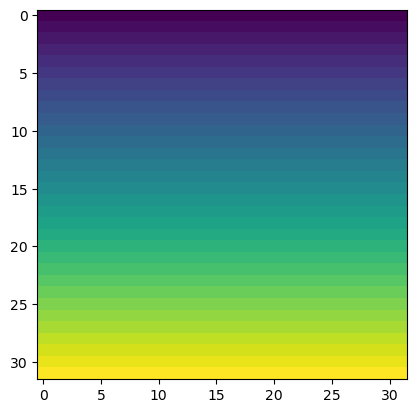

In [15]:
plt.imshow(np.outer(np.linspace(-3, 3, 32), np.ones(32)))

In [16]:
import tensorflow as tf
train_dir = f'data/ssq/train/'
test_dir = f'data/ssq/test/'

# tf.data.Dataset object

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                                    labels='inferred', 
                                                                    label_mode='binary',
                                                                    color_mode='rgb',
                                                                    shuffle=True,
                                                                    seed=42,
                                                                    batch_size=32,
                                                                    image_size=(500, 495))


test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_dir, 
                                                                  labels='inferred', 
                                                                  label_mode='binary',
                                                                  color_mode='rgb',
                                                                  shuffle=True,
                                                                  seed=42,
                                                                  batch_size=32,
                                                                  image_size=(500, 495))

KeyboardInterrupt: 

In [ ]:
norm_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)
resize_layer = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)

norm_train_dataset = train_dataset.map(lambda x, y: (resize_layer(norm_layer(x)), y))
norm_test_dataset = test_dataset.map(lambda x, y: (resize_layer(norm_layer(x)), y))

for b_X, b_y in norm_train_dataset:
    print('batch X shape', b_X.shape)
    print('batch y shape', b_y.shape)
    print(f'max {np.max(b_X[0])}  min {np.min(b_X[0])}')
    break
import tensorflow as tf
from keras.layers import Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout, Resizing
from keras import Model
from keras.applications import ResNet50


input_size = (500, 495, 3)

def get_model():
    model_res = ResNet50(include_top=True, input_shape=(224,224,3), weights='imagenet')
    # take the last global average pooling with fewer parameters
    x = model_res.layers[-2].output
    
    x = Dense(2048)(x)
    x = Activation('relu')(x)
    x = Dropout(.5)(x)
    
    x = Dense(2048)(x)
    x = Activation('relu')(x)
    x = Dropout(.5)(x)
    
    x = Dense(1)(x)
    outputs = Activation('sigmoid')(x)

    model = Model(model_res.input, outputs)
    return model

model = get_model()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
checkpoint = tf.keras.callbacks.ModelCheckpoint('/tmp/checkpoint', monitor='val_accuracy', save_best_only=True)
model.fit(norm_train_dataset, validation_data=norm_test_dataset, epochs=20, callbacks=[callback, checkpoint])

In [ ]:
from keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt

batch_size = 32
n_epochs = 10

import keras.backend as K

def fp(y_true, y_pred):
    return K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)/batch_size

def fn(y_true, y_pred):
    return K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)/batch_size

def tp(y_true, y_pred):
    return K.sum(K.cast(y_true*y_pred, 'float'), axis=0)/batch_size

def tn(y_true, y_pred):
    return K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)/batch_size

norm_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)
resize_layer = tf.keras.layers.experimental.preprocessing.Resizing(32, 32)

norm_train_dataset = train_dataset.map(lambda x, y: (resize_layer(norm_layer(x)), y))
norm_test_dataset = test_dataset.map(lambda x, y: (resize_layer(norm_layer(x)), y))

model = models.Sequential()

model.add(layers.Input(shape=(32, 32, 3)))

model.add(layers.Conv2D(32, (3,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32, (3,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32, (3,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(32))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dense(32))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=5e-5, weight_decay=0.1)
callback1 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, start_from_epoch=3)
callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, start_from_epoch=3)
filepath = 'best_ssq_model.hdf5'
save = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, 
                         monitor='val_accuracy',
                         verbose=1, 
                         save_best_only=True,
                         mode='max')

model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', tp, fp, fn, tn])

history = model.fit(norm_train_dataset, epochs=n_epochs, 
                    validation_data=norm_test_dataset, batch_size=batch_size, callbacks=[save])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import skimage.measure
from ssqueezepy import cwt, ssqueeze, ssq_cwt, ssq_stft
from ssqueezepy.visuals import plot, imshow
#t = np.linspace(0, 5000, 5000)
x = d_s[train_keys[0][0]]
plot(x, title="x(t) | t=[0, ..., 1], %s samples" % len(x), show=1)



#Wx, scales = cwt(x, 'morlet', fs=1000, nv=33)
#Tx, fs = ssqueeze(Wx, scales=scales, transform='cwt', squeezing='sum')
Tx, Wx,ssq_freqs, scales = ssq_cwt(x, 'morlet', fs=100, nv=20, squeezing='sum')
#Tx = skimage.measure.block_reduce(Tx, (5, 5), np.average)

print(Tx.shape)
print(Wx.shape)
imshow(Tx,  abs=1,
       title="log|CWT|, Morlet wavelet",
       ylabel="ssq freqs", xlabel="time [ms]", cmap='jet')


def get_scalograms(train_epochs, val_epochs, n_splits=3, sfreq=100, nv = 50):
    train_epochs_scalo = []
    test_epochs_scalo = []
    for i in range(n_splits):
       print(i)
       train_scalo = list()
       test_scalo = list()
       j = 0
       for v in train_epochs[i].values():
              train_scalo.append(np.abs(ssq_cwt(v, 'morlet', fs=sfreq, nv=nv)[0]))
              j+=1
              print(j)
       for v in val_epochs[i].values():
              test_scalo.append(np.abs(ssq_cwt(v, 'morlet', fs=sfreq, nv=nv)[0]))
       train_epochs_scalo.append(np.stack(train_scalo, axis=0))
       test_epochs_scalo.append(np.stack(test_scalo, axis=0))
    return train_epochs_scalo, test_epochs_scalo

#train_epochs_scalo, val_epochs_scalo = get_scalograms(train_epochs, val_epochs, n_splits=n_splits, sfreq=100, nv=20)
